<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Financial Time Series

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## pandas Basics

In [2]:
import numpy as np
import pandas as pd

### First Steps with DataFrame Class

In [3]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
df.index  # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.columns  # the column names

Index(['numbers'], dtype='object')

In [6]:
df.ix['c']  # selection via index

numbers    30
Name: c, dtype: int64

In [7]:
df.ix[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [8]:
df.ix[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [9]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [14]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [15]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
  # temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [16]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [17]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
  # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [18]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [19]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [20]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### Second Steps with DataFrame Class

In [21]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[ 0.140125, -1.07341 ,  0.554261,  0.999884],
       [-1.216103,  0.863029, -0.965085,  0.186462],
       [-0.639336,  0.531045,  0.628334, -0.226602],
       [ 0.667781, -0.26381 , -1.75847 , -0.529244],
       [-0.404821,  0.790723,  1.446441, -1.327123],
       [ 1.051975,  0.509385, -0.025594,  0.312091],
       [ 2.289974, -0.658976,  0.682715,  1.114506],
       [-0.647023,  2.010783, -2.034569, -0.234976],
       [-0.932835,  0.289579, -0.632438, -0.627044]])

In [22]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,0.140125,-1.073410,0.554261,0.999884
1,-1.216103,0.863029,-0.965085,0.186462
2,-0.639336,0.531045,0.628334,-0.226602
3,0.667781,-0.263810,-1.758470,-0.529244
4,-0.404821,0.790723,1.446441,-1.327123
5,1.051975,0.509385,-0.025594,0.312091
6,2.289974,-0.658976,0.682715,1.114506
7,-0.647023,2.010783,-2.034569,-0.234976
8,-0.932835,0.289579,-0.632438,-0.627044


In [23]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,0.140125,-1.073410,0.554261,0.999884
1,-1.216103,0.863029,-0.965085,0.186462
2,-0.639336,0.531045,0.628334,-0.226602
3,0.667781,-0.263810,-1.758470,-0.529244
4,-0.404821,0.790723,1.446441,-1.327123
5,1.051975,0.509385,-0.025594,0.312091
6,2.289974,-0.658976,0.682715,1.114506
7,-0.647023,2.010783,-2.034569,-0.234976
8,-0.932835,0.289579,-0.632438,-0.627044


In [24]:
df['No2'][3]  # value in column No2 at index position 3

-0.2638097887813789

In [25]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [26]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,0.140125,-1.073410,0.554261,0.999884
2015-02-28,-1.216103,0.863029,-0.965085,0.186462
2015-03-31,-0.639336,0.531045,0.628334,-0.226602
2015-04-30,0.667781,-0.263810,-1.758470,-0.529244
2015-05-31,-0.404821,0.790723,1.446441,-1.327123
2015-06-30,1.051975,0.509385,-0.025594,0.312091
2015-07-31,2.289974,-0.658976,0.682715,1.114506
2015-08-31,-0.647023,2.010783,-2.034569,-0.234976
2015-09-30,-0.932835,0.289579,-0.632438,-0.627044


In [27]:
np.array(df).round(6)

array([[ 0.140125, -1.07341 ,  0.554261,  0.999884],
       [-1.216103,  0.863029, -0.965085,  0.186462],
       [-0.639336,  0.531045,  0.628334, -0.226602],
       [ 0.667781, -0.26381 , -1.75847 , -0.529244],
       [-0.404821,  0.790723,  1.446441, -1.327123],
       [ 1.051975,  0.509385, -0.025594,  0.312091],
       [ 2.289974, -0.658976,  0.682715,  1.114506],
       [-0.647023,  2.010783, -2.034569, -0.234976],
       [-0.932835,  0.289579, -0.632438, -0.627044]])

### Basic Analytics

In [28]:
df.sum()

No1    0.309738
No2    2.998348
No3   -2.104405
No4   -0.332046
dtype: float64

In [29]:
df.mean()

No1    0.034415
No2    0.333150
No3   -0.233823
No4   -0.036894
dtype: float64

In [30]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,0.140125,-1.073410,0.554261,0.999884
2015-02-28,-1.075978,-0.210381,-0.410824,1.186346
2015-03-31,-1.715314,0.320664,0.217510,0.959744
2015-04-30,-1.047533,0.056854,-1.540960,0.430500
2015-05-31,-1.452354,0.847577,-0.094519,-0.896623
2015-06-30,-0.400378,1.356962,-0.120113,-0.584532
2015-07-31,1.889596,0.697987,0.562602,0.529974
2015-08-31,1.242573,2.708770,-1.471967,0.294998
2015-09-30,0.309738,2.998348,-2.104405,-0.332046


In [31]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.034415,0.333150,-0.233823,-0.036894
std,1.126160,0.914864,1.190166,0.782856
min,-1.216103,-1.073410,-2.034569,-1.327123
25%,-0.647023,-0.263810,-0.965085,-0.529244
50%,-0.404821,0.509385,-0.025594,-0.226602
75%,0.667781,0.790723,0.628334,0.312091
max,2.289974,2.010783,1.446441,1.114506


In [32]:
np.sqrt(df)

/Users/yves/miniconda3/envs/base/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,No1,No2,No3,No4
2015-01-31,0.374333,NaN,0.744487,0.999942
2015-02-28,NaN,0.928993,NaN,0.431813
2015-03-31,NaN,0.728728,0.792675,NaN
2015-04-30,0.817179,NaN,NaN,NaN
2015-05-31,NaN,0.889226,1.202681,NaN
2015-06-30,1.025659,0.713712,NaN,0.558651
2015-07-31,1.513266,NaN,0.826266,1.055702
2015-08-31,NaN,1.418021,NaN,NaN
2015-09-30,NaN,0.538125,NaN,NaN


In [33]:
np.sqrt(df).sum()

/Users/yves/miniconda3/envs/base/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


No1    3.730436
No2    5.216806
No3    3.566109
No4    3.046107
dtype: float64

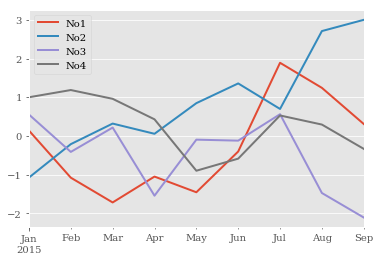

In [34]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

### Series Class

In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df['No1']

2015-01-31    0.140125
2015-02-28   -1.216103
2015-03-31   -0.639336
2015-04-30    0.667781
2015-05-31   -0.404821
2015-06-30    1.051975
2015-07-31    2.289974
2015-08-31   -0.647023
2015-09-30   -0.932835
Freq: M, Name: No1, dtype: float64

In [37]:
type(df['No1'])

pandas.core.series.Series

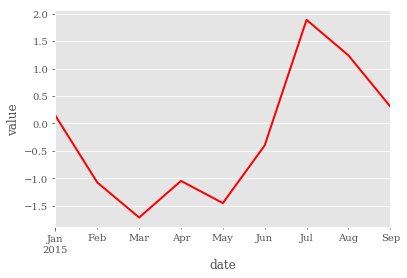

In [38]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')
# tag: time_series
# title: Line plot of a Series object

### GroupBy Operations

In [39]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,0.140125,-1.073410,0.554261,0.999884,Q1
2015-02-28,-1.216103,0.863029,-0.965085,0.186462,Q1
2015-03-31,-0.639336,0.531045,0.628334,-0.226602,Q1
2015-04-30,0.667781,-0.263810,-1.758470,-0.529244,Q2
2015-05-31,-0.404821,0.790723,1.446441,-1.327123,Q2
2015-06-30,1.051975,0.509385,-0.025594,0.312091,Q2
2015-07-31,2.289974,-0.658976,0.682715,1.114506,Q3
2015-08-31,-0.647023,2.010783,-2.034569,-0.234976,Q3
2015-09-30,-0.932835,0.289579,-0.632438,-0.627044,Q3


In [40]:
groups = df.groupby('Quarter')

In [41]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.571771,0.106888,0.072503,0.319915
Q2,0.438312,0.345433,-0.112541,-0.514759
Q3,0.236705,0.547129,-0.661431,0.084162


In [42]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.140125,0.863029,0.628334,0.999884
Q2,1.051975,0.790723,1.446441,0.312091
Q3,2.289974,2.010783,0.682715,1.114506


In [43]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [44]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [45]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [46]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [47]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -1.216103  0.863029 -0.965085  0.186462
        Odd      -0.249605 -0.271182  0.591297  0.386641
Q2      Even      0.859878  0.122788 -0.892032 -0.108577
        Odd      -0.404821  0.790723  1.446441 -1.327123
Q3      Even     -0.647023  2.010783 -2.034569 -0.234976
        Odd       0.678570 -0.184699  0.025139  0.243731

## Financial Data

In [48]:
from pandas_datareader import data as web

In [49]:
DAX = web.DataReader(name='SPY', data_source='google',
                     start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 2001-08-10 to 2017-07-10
Data columns (total 5 columns):
Open      3981 non-null float64
High      3981 non-null float64
Low       3981 non-null float64
Close     4000 non-null float64
Volume    4000 non-null int64
dtypes: float64(4), int64(1)
memory usage: 187.5 KB


In [50]:
DAX.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-03,242.88,243.38,242.21,242.21,39153806
2017-07-05,242.63,243.01,241.70,242.77,54427596
2017-07-06,241.89,242.03,240.34,240.55,66115317
2017-07-07,241.21,242.28,240.56,242.11,57972268
2017-07-10,241.95,242.80,241.76,242.37,36663274


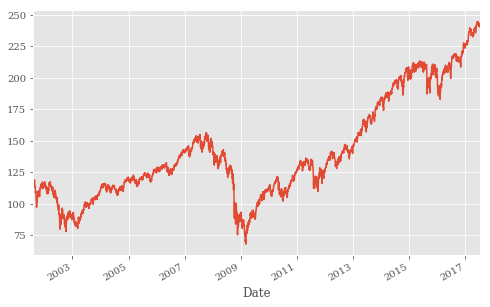

In [51]:
DAX['Close'].plot(figsize=(8, 5), grid=True)
# tag: dax
# title: Historical DAX index levels

In [52]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

CPU times: user 26.9 ms, sys: 866 µs, total: 27.8 ms
Wall time: 27.3 ms


In [53]:
DAX[['Close', 'Return', 'Return']].tail()

,Close,Return,Return
Date,,,
2017-07-03,242.21,0.001694,0.001694
2017-07-05,242.77,0.002309,0.002309
2017-07-06,240.55,-0.009187,-0.009187
2017-07-07,242.11,0.006464,0.006464
2017-07-10,242.37,0.001073,0.001073


array([<matplotlib.axes._subplots.AxesSubplot object at 0x118de4518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119f6b898>], dtype=object)

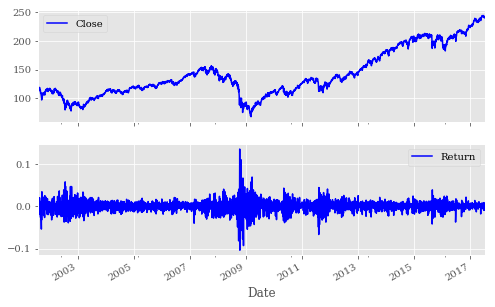

In [54]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True)
# tag: dax_returns
# title: The DAX index and daily log returns

In [55]:
DAX['42d'] = DAX['Close'].rolling(window=42).mean()
DAX['252d'] = DAX['Close'].rolling(window=252).mean()

In [56]:
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2017-07-03,242.21,241.615714,226.718294
2017-07-05,242.77,241.711190,226.854643
2017-07-06,240.55,241.731429,226.977222
2017-07-07,242.11,241.789762,227.106508
2017-07-10,242.37,241.859524,227.224444


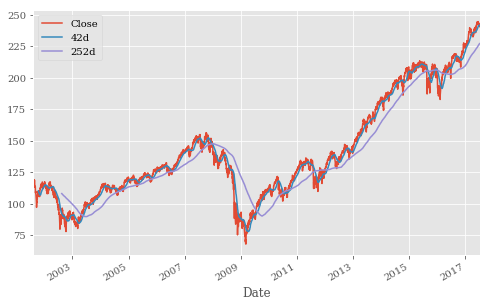

In [57]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)
# tag: dax_trends
# title: The DAX index and moving averages

In [58]:
import math
DAX['Mov_Vol'] = DAX['Return'].rolling(window=252).std() * math.sqrt(252)
  # moving annual volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a47b160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a472a90>], dtype=object)

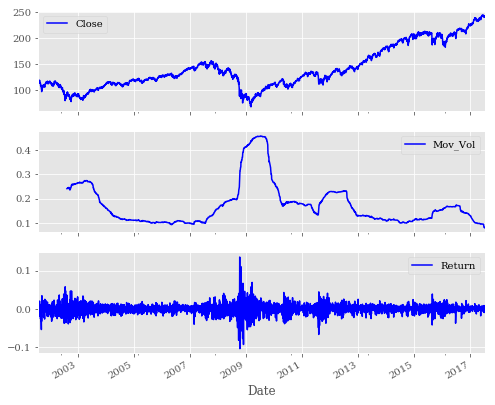

In [59]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True)
# tag: dax_mov_std
# title: The DAX index and moving, annualized volatility

## Regression Analysis

In [60]:
import pandas as pd
from urllib import request

In [61]:
es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
request.urlretrieve(es_url, './data/es.txt')
request.urlretrieve(vs_url, './data/vs.txt')
!ls -o ./data/*.txt
# Windows: use dir

-rw-r--r--@ 1 yves  688500 Jul 11 19:24 ./data/es.txt
-rw-r--r--@ 1 yves  363485 Jul 11 19:24 ./data/vs.txt


In [62]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [63]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [64]:
for line in lines[3883:3890]:
    print(line[41:], end='')

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [65]:
new_file = open('./data/es50.txt', 'w')
    # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
    # writes the corrected third line of the orginal file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orginial file
new_file.close()

In [66]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [67]:
es = pd.read_csv('./data/es50.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)

In [68]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [69]:
del es['DEL'] 
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [70]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [71]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [72]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [73]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [74]:
data = data[data.index < '2015-12-31']

In [75]:
data.tail()

,EUROSTOXX,VSTOXX
2015-12-23,3286.68,20.2504
2015-12-24,3284.47,NaN
2015-12-28,3256.49,22.4544
2015-12-29,3314.28,21.6067
2015-12-30,3287.98,22.1745


array([<matplotlib.axes._subplots.AxesSubplot object at 0x119eb6748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b36fac8>], dtype=object)

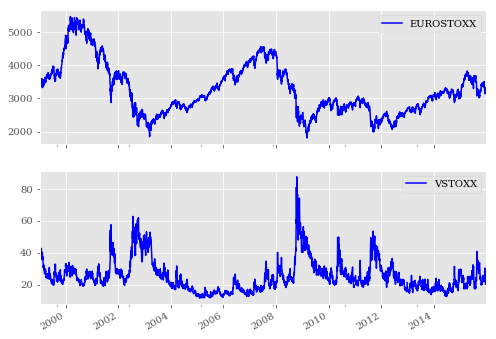

In [76]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs
# title: The EURO STOXX 50 Index and the VSTOXX volatility index

In [77]:
rets = np.log(data / data.shift(1)) 
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


In [78]:
rets.dropna(inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bb38f28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11bb400f0>], dtype=object)

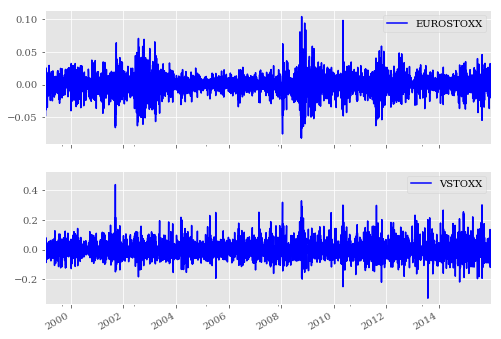

In [79]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs_rets
# title: Log returns of EURO STOXX 50 and VSTOXX

In [80]:
import numpy as np

In [81]:
xdat = rets['EUROSTOXX'].values
ydat = rets['VSTOXX'].values
reg = np.polyfit(x=xdat, y=ydat, deg=1)
reg

array([ -2.83831710e+00,  -2.67365316e-04])

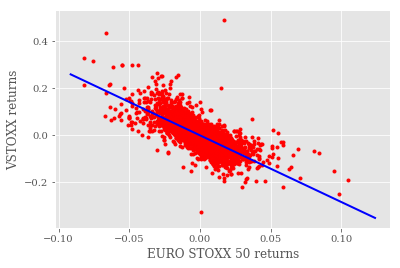

In [82]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(reg, x), 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [83]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.737094
VSTOXX,-0.737094,1.000000


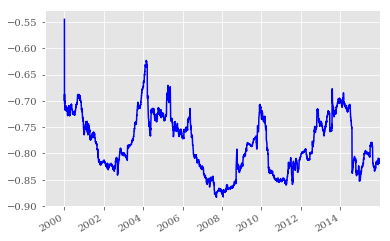

In [84]:
rets['EUROSTOXX'].rolling(window=252).corr(rets['VSTOXX']).plot(grid=True, style='b')
# tag: roll_corr
# title: Rolling correlation between EURO STOXX 50 and VSTOXX

## High Frequency Data

In [85]:
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

In [86]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2

In [87]:
year = '2017'
month = '07'
days = ['03', '04', '05', '06', '07']
  # dates might need to be updated

In [88]:
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day),
                       index_col=0, header=0, parse_dates=True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
  # shorter colummn names

In [89]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39953 entries, 2017-07-03 10:00:01 to 2017-07-07 23:14:00
Data columns (total 6 columns):
bid        39953 non-null float64
bdepth     39953 non-null float64
bdeptht    39953 non-null float64
offer      39953 non-null float64
odepth     39953 non-null float64
odeptht    39953 non-null float64
dtypes: float64(6)
memory usage: 2.1 MB


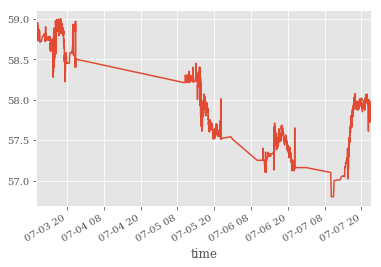

In [90]:
NKE['bid'].plot(grid=True)
# tag: aapl
# title: Nike stock tick data for a week

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d2cff60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11ba476a0>], dtype=object)

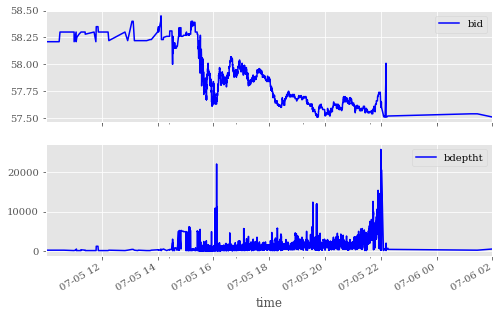

In [91]:
to_plot = NKE[['bid', 'bdeptht']][
    (NKE.index > dt.datetime(2017, 7, 5, 0, 0))
 &  (NKE.index < dt.datetime(2017, 7, 6, 2, 59))]
  # adjust dates to given data set
to_plot.plot(subplots=True, style='b', figsize=(8, 5), grid=True)

In [92]:
NKE_resam = NKE.resample(rule='5min').mean()
np.round(NKE_resam.head(), 2)

,bid,bdepth,bdeptht,offer,odepth,odeptht
time,,,,,,
2017-07-03 10:00:00,58.81,500.0,500.0,59.20,300.0,300.0
2017-07-03 10:05:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-03 10:10:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-03 10:15:00,58.80,300.0,300.0,59.00,100.0,100.0
2017-07-03 10:20:00,58.90,187.5,187.5,58.96,100.0,100.0


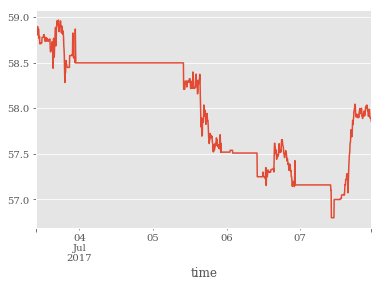

In [93]:
NKE_resam['bid'].fillna(method='ffill').plot(grid=True)
# tag: aapl_resam
# title: Resampled Apple stock tick data

In [94]:
def reversal(x):
    return 2 * 95 - x

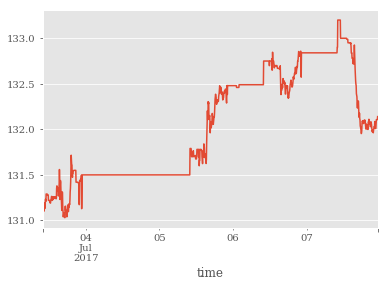

In [95]:
NKE_resam['bid'].fillna(method='ffill').apply(reversal).plot(grid=True)
# tag: aapl_resam_apply
# title: Resampled Apple stock tick data with function applied to it

In [96]:
!rm ./data/*
  # Windows: del /data/*

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>